# imports and Load DataSet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32411.000000,3.241100e+04,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000,32411.000000
mean,27.730369,6.589796e+04,4.761377,9593.591682,11.017117,0.218722,0.170259,5.811052
std,6.210448,5.252093e+04,3.983639,6322.529723,3.083224,0.413386,0.106808,4.057816
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.017117,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Data Preprocessing: Handling Categorical and Numerical Features with Pipelines 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32411 entries, 0 to 32410
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32411 non-null  int64  
 1   person_income               32411 non-null  int64  
 2   person_home_ownership       32411 non-null  object 
 3   person_emp_length           32411 non-null  float64
 4   loan_intent                 32411 non-null  object 
 5   loan_grade                  32411 non-null  object 
 6   loan_amnt                   32411 non-null  int64  
 7   loan_int_rate               32411 non-null  float64
 8   loan_status                 32411 non-null  int64  
 9   loan_percent_income         32411 non-null  float64
 10  cb_person_default_on_file   32411 non-null  object 
 11  cb_person_cred_hist_length  32411 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [6]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']       

In [7]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32406,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32407,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32408,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32409,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [8]:
# Xác định các đặc trưng cần được xử lý
categorical_features_onehot = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
categorical_features_ordinal = ['loan_grade']
numerical_features = ['person_age', 'person_income', 'person_emp_length',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length']

#Create preprocessing steps for each feature type
categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
    ])

categorical_transformer_ordinal = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ])

numerical_transformer = Pipeline(
    steps=[
        ("encoder", PowerTransformer())
    ])

# Create a ColumnTransformer to apply preprocessing steps to each feature type
preprocessor = ColumnTransformer(transformers=[
    ('cat_onehot', categorical_transformer_onehot, categorical_features_onehot),
    ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal),
    ('num', numerical_transformer, numerical_features)
])

# Create pipeline 
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
)
# Fit pipeline
pipe_fit = pipeline.fit(X)

# Get the characteristic name of OneHotEncoder
onehot_feature_names = pipe_fit.named_steps['preprocessor'].named_transformers_['cat_onehot'].named_steps['encoder'].get_feature_names_out(categorical_features_onehot)

# Get the characteristic name of PowerTransformer
numerical_feature_names = pipe_fit.named_steps['preprocessor'].named_transformers_['num'].named_steps['encoder'].get_feature_names_out(numerical_features)

# Aggregate all feature names, including direct classification features
all_feature_names = np.concatenate([onehot_feature_names, numerical_feature_names, categorical_features_ordinal])

# Converts the data to a DataFrame with the specified characteristic name
data = pd.DataFrame(pipe_fit.transform(X), columns=all_feature_names)

In [9]:
data.columns.tolist()

['person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'cb_person_default_on_file_Y',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_grade']

In [10]:
data

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,-1.336154,0.122605,0.055283,2.536959,1.542368,2.368859,-0.707678
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.802640,-3.260596,0.310084,-2.397295,0.098037,-0.619439,-1.446112
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,-0.289908,-3.260596,-1.048174,-0.538085,0.635719,2.321207,-0.707678
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,-0.935869,0.306533,0.055283,2.536959,1.322639,2.216550,-1.446112
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,-0.590190,-0.021034,0.924802,2.536959,1.049033,2.270516,-0.203560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.219991,-0.067316,-1.048174,-0.467273,0.722824,-0.484396,2.355386
32407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.165060,1.350015,0.055283,1.237957,-1.164922,0.000886,1.934137
32408,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.326619,0.566251,-0.239638,2.536959,0.049838,1.997916,2.297067
32409,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.202805,1.725305,0.310084,0.961942,0.206305,-0.619439,2.232389


# Outlier Detection and Removal Using ECOD Algorithm

In [55]:
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data)
outliers = clf.predict(data) 

data["outliers"] = outliers
X.loc[:, "outliers"] = outliers
# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

In [12]:
print(data_no_outliers.shape)
print(data_with_outliers.shape)

(29170, 17)
(32411, 17)


# Determining Optimal Number of Clusters using the Elbow Method (K-Means)

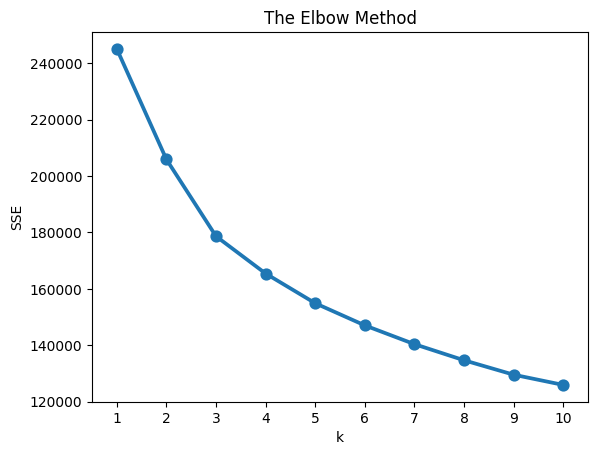

In [13]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_no_outliers)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [14]:
km = KMeans(n_clusters= 5 , 
            init= 'k-means++' , 
            n_init= 10 , 
            max_iter= 100 , 
            random_state= 42 ) 

clusters_predict = km.fit_predict(data_no_outliers) 

# Evaluation

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 1.9735898925494244
Calinski Score: 4246.605010473452
Silhouette Score: 0.12969925685164416


# PCA 

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(data_no_outliers)

In [17]:
km1 = KMeans(n_clusters= 5 , 
            init= 'k-means++' , 
            n_init= 10 , 
            max_iter= 100 , 
            random_state= 42 ) 

clusters_predict_1 = km.fit_predict(pca_data) 

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(pca_data,clusters_predict_1)}")
print(f"Calinski Score: {calinski_harabasz_score(pca_data,clusters_predict_1)}")
print(f"Silhouette Score: {silhouette_score(pca_data,clusters_predict_1)}")

Davies bouldin score: 1.810425451528119
Calinski Score: 4957.249705292761
Silhouette Score: 0.14908551025083508


# 2D Dimensionality Reduction for Visualization using sklearn.decomposition.PCA

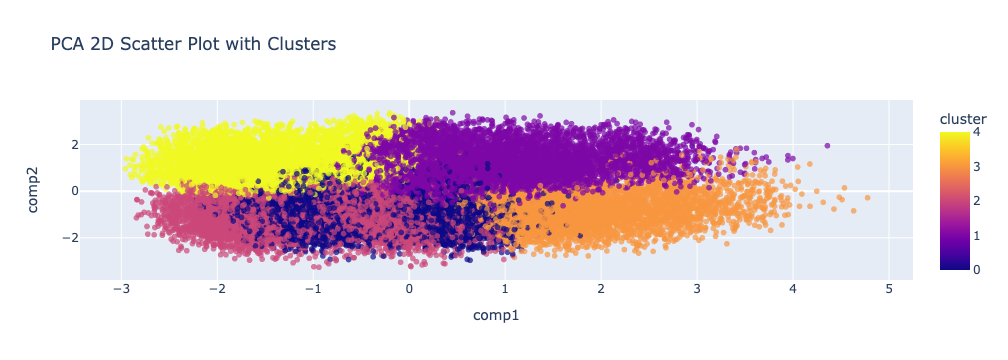

In [28]:
import plotly.express as px
from sklearn.decomposition import PCA

def get_pca_2d(df, predict):
    # Khởi tạo PCA với 2 thành phần
    pca = PCA(n_components=2, random_state=42)
    
    # Fit và transform dữ liệu
    pca_result = pca.fit_transform(df)
    
    # Tạo DataFrame mới chứa kết quả PCA và cluster
    df_pca_2d = pd.DataFrame(pca_result, columns=["comp1", "comp2"])
    df_pca_2d["cluster"] = predict
    
    return pca, df_pca_2d


pca_obj, df_pca_2d = get_pca_2d(pca_data, clusters_predict_1)

#  plot
fig = px.scatter(
    df_pca_2d,
    x="comp1",
    y="comp2",
    color="cluster",
    title="PCA 2D Scatter Plot with Clusters",
    opacity=0.7
)
fig.show()

In [30]:
print("Explained variance ratio:", pca_obj.explained_variance_ratio_)

Explained variance ratio: [0.25754932 0.21826963]


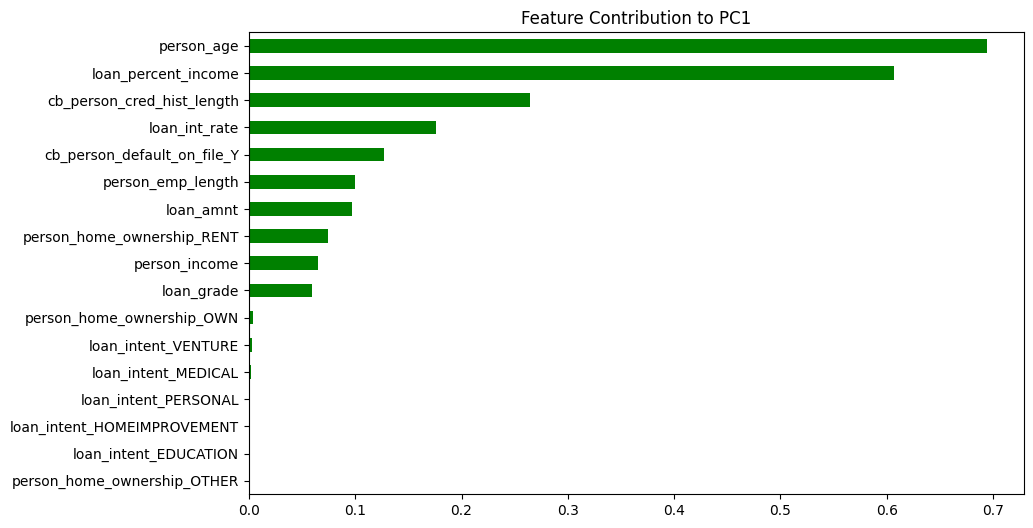

In [47]:
loading_scores = pd.DataFrame(pca.components_.T, index=data_no_outliers.columns, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
loading_scores_abs = loading_scores.abs()

# Biểu đồ thanh PC1
loading_scores_abs['PC1'].sort_values(ascending=True).plot(kind='barh', figsize=(10,6), color='green')
plt.title("Feature Contribution to PC1")
plt.show()

In [57]:
df_no_outliers = X[X.outliers == 0].copy()
df_no_outliers["cluster"] = clusters_predict  

In [67]:
df.columns.tolist()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [65]:
summary = df_no_outliers.groupby('cluster').agg({
    'person_age': lambda x: round(x.mean(), 2),
    'person_income': lambda x: round(x.mean(), 2),
    'person_home_ownership': lambda x: x.mode()[0],
    'person_emp_length': lambda x: x.mode()[0],
    'loan_intent': lambda x: x.mode()[0],
    'loan_grade': lambda x: x.mode()[0],
    'loan_amnt': lambda x: round(x.mean(), 2),
    'loan_int_rate': lambda x: round(x.mean(), 2),
    'loan_percent_income': lambda x: round(x.mean(), 2),
    'cb_person_default_on_file': lambda x: x.mode()[0],
    'cb_person_cred_hist_length': lambda x: round(x.mean(), 2),
    'outliers': lambda x: x.mode()[0]
}).reset_index()

In [66]:
summary

,cluster,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,outliers
0,0,23.98,58985.50,RENT,4.0,EDUCATION,B,13127.78,9.54,0.25,N,3.25,0
1,1,23.81,60216.76,RENT,0.0,EDUCATION,A,4754.28,9.33,0.09,N,3.11,0
2,2,31.72,76939.15,MORTGAGE,4.0,MEDICAL,A,8547.19,8.80,0.12,N,8.61,0
3,3,23.74,58393.82,RENT,0.0,EDUCATION,C,9759.35,14.04,0.18,N,3.07,0
4,4,31.80,59176.30,RENT,0.0,MEDICAL,C,10520.54,12.90,0.19,N,8.74,0
